Data Prepared
====

In [1]:
using ZipFile, CSV, DataFrames, Random, StatsBase , Plots, Statistics

# read file from zip archive

z = ZipFile.Reader("results.zip")

# identify the right file in zip

# The diabetes dataset I found through kaggle have done split into 2 classifiers and select 50 percents of result from each 
# label. So i think there is more work in my dataset

a_file_in_zip = filter(x->x.name == "diabetes_binary_5050split_health_indicators_BRFSS2015.csv", z.files)[1]

#avoid changing the original files in the zip file. However, the dataset will not change but whatever.

a_copy = CSV.File(a_file_in_zip) |> DataFrame

close(z)

#show the dataset

a_copy

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,1.0,1.0,25.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0
3,0.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0
7,0.0,1.0,1.0,1.0,36.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0


In [2]:
# Transfer DataFrame to matrix form

df=a_copy|>Tables.matrix

# Transfer the dataset to 2-classifiers. df_0 represents the result is 0, df_1 represents the result is 1.
# Due to my datasset is binary problems, and each result is 50 percents of the whole dataset. So i didn't add any other pre-actions for dataset. 

df_0 = df[df[:,1] .== 0, :]
df_1 = df[df[:,1] .== 1, :]

35346×22 Matrix{Float64}:
 1.0  1.0  1.0  1.0  30.0  1.0  0.0  1.0  …  30.0  1.0  0.0   9.0  5.0  1.0
 1.0  0.0  0.0  1.0  25.0  1.0  0.0  0.0      0.0  0.0  1.0  13.0  6.0  8.0
 1.0  1.0  1.0  1.0  28.0  0.0  0.0  0.0      0.0  1.0  0.0  11.0  4.0  6.0
 1.0  0.0  0.0  1.0  23.0  1.0  0.0  0.0      0.0  0.0  1.0   7.0  5.0  6.0
 1.0  1.0  0.0  1.0  27.0  0.0  0.0  0.0      0.0  0.0  0.0  13.0  5.0  4.0
 1.0  1.0  1.0  1.0  37.0  1.0  1.0  1.0  …   0.0  1.0  1.0  10.0  6.0  5.0
 1.0  1.0  1.0  1.0  28.0  1.0  0.0  1.0      0.0  0.0  1.0  12.0  2.0  4.0
 1.0  1.0  1.0  1.0  27.0  1.0  0.0  0.0     20.0  1.0  0.0   8.0  4.0  7.0
 1.0  1.0  1.0  1.0  34.0  1.0  1.0  0.0      7.0  1.0  0.0   9.0  5.0  4.0
 1.0  1.0  1.0  1.0  24.0  1.0  0.0  0.0      0.0  0.0  0.0  12.0  3.0  3.0
 1.0  1.0  0.0  1.0  31.0  0.0  0.0  0.0  …   5.0  0.0  0.0  13.0  4.0  4.0
 1.0  1.0  1.0  1.0  33.0  1.0  0.0  0.0     30.0  1.0  0.0  11.0  4.0  2.0
 1.0  1.0  1.0  1.0  27.0  1.0  0.0  0.0     30.0  1.0  0.0  1

In [3]:
# The columns of matrix is 35346(here just using 35000 is the same), using random sub-sequence to select 70 percents of 
# columns as the train data.

sample = randsubseq(1:35000, 0.7)
train_df = vcat(df_0[sample, :], df_1[sample, :])

# Then from the not selected columns (which is 30 percents) to select the test data.

notsample = [i for i in 1:35000 if isempty(searchsorted(sample, i))]
test_df = vcat(df_0[notsample, :], df_1[notsample, :])

21156×22 Matrix{Float64}:
 0.0  0.0  0.0  0.0  25.0  1.0  0.0  0.0  …   0.0  0.0  0.0  11.0  6.0  8.0
 0.0  0.0  0.0  0.0  24.0  0.0  0.0  0.0      0.0  0.0  1.0   7.0  5.0  8.0
 0.0  1.0  1.0  1.0  36.0  0.0  0.0  0.0      2.0  0.0  1.0  11.0  6.0  8.0
 0.0  1.0  1.0  1.0  27.0  0.0  0.0  0.0      0.0  0.0  1.0   8.0  5.0  4.0
 0.0  1.0  1.0  1.0  30.0  0.0  0.0  0.0     10.0  0.0  0.0   7.0  6.0  8.0
 0.0  1.0  1.0  1.0  31.0  1.0  0.0  0.0  …   0.0  0.0  1.0   8.0  4.0  8.0
 0.0  1.0  1.0  1.0  26.0  1.0  0.0  1.0     15.0  1.0  1.0   9.0  3.0  3.0
 0.0  0.0  0.0  1.0  31.0  0.0  0.0  0.0      2.0  0.0  0.0   3.0  6.0  8.0
 0.0  1.0  1.0  1.0  33.0  1.0  0.0  0.0      0.0  0.0  0.0   8.0  4.0  3.0
 0.0  1.0  1.0  1.0  29.0  0.0  0.0  0.0      0.0  0.0  0.0  12.0  3.0  2.0
 0.0  1.0  1.0  1.0  27.0  0.0  0.0  0.0  …   0.0  0.0  0.0  11.0  4.0  3.0
 0.0  0.0  0.0  1.0  27.0  0.0  0.0  0.0      1.0  0.0  0.0   6.0  6.0  7.0
 0.0  0.0  0.0  1.0  26.0  1.0  0.0  0.0      0.0  0.0  0.0   

In [4]:
# Divide the columns into features and result. From my dataset, From 2 to 22 columns are the attributes of whether diabetes or not.

X_train = train_df[:, 2:22]
X_test = test_df[:, 2:22]

y_train = train_df[:, 1]
y_test = test_df[:, 1]

21156-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [5]:
using Distributions

# Transfer the X_train to 1 diminension.

dt = fit(ZScoreTransform, X_train, dims=1)

# Using StateBase package to transfer X_train and X_test(make them standard) to the same formate as dt.

X_train_std = StatsBase.transform(dt, X_train)
X_test_std = StatsBase.transform(dt, X_test)

# Transpose the X_train_std and X_test_std.
    
X_train_std, X_test_std= transpose(X_train_std), transpose(X_test_std)

([-1.1434716619741414 0.8745118571018049 … 0.8745118571018049 0.8745118571018049; 0.9474032514701192 0.9474032514701192 … -1.0554951390599407 -1.0554951390599407; … ; 0.07697766693135667 0.07697766693135667 … -1.8656196792816078 -0.8943210061751256; 0.5955156758064295 1.0563786666816453 … -0.7870732968192181 -0.7870732968192181], [-1.1434716619741414 -1.1434716619741414 … -1.1434716619741414 0.8745118571018049; -1.0554951390599407 -1.0554951390599407 … -1.0554951390599407 0.9474032514701192; … ; 1.048276340037839 0.07697766693135667 … 0.07697766693135667 -2.83691835238809; 1.0563786666816453 1.0563786666816453 … -1.70879927856965 -1.70879927856965])

Construct the neural network
=======

In [6]:
"""
    Funtion to initialise the parameters or weights of the desired network.
    In my example, layer_dims=3.
"""
function initialize_model_weights(layer_dims, seed = 7)
    params = Dict()

    for l=2:length(layer_dims)
        params[string("W_", (l-1))] = rand(MersenneTwister(seed), Uniform(-1, 1), layer_dims[l], layer_dims[l-1]) * sqrt(6 / (layer_dims[l]+layer_dims[l-1]))
        params[string("b_", (l-1))] = zeros(layer_dims[l], 1)
    end
    return params
end

initialize_model_weights

In [7]:
#   sigmiod function for activation

function sd_sigmoid(Z)
    A = 1 ./ (1 .+ exp.(.-Z))
    return (A = A, Z = Z)
end

"""
    Make a forward activation from a linear forward.
    For example:
        Z_prev=W_1*A_0+b_1
        Using sigmoid function activates
        DO it second time in second layer(which is last layer in my example)
        Z_prev=W_2*A_!+b_2
"""

function forward_activation(A_prev, W, b, activation_function="sigmoid")
    Z = (W * A_prev) .+ b
    linear_cache = (A_prev, W, b)
    A, activation_cache = sd_sigmoid(Z)

    cache = (linear_step_cache=linear_cache, activation_step_cache=activation_cache)
    @assert size(A) == (size(W, 1), size(A_prev, 2))

    return A, cache
end


"""
    Forward the design matrix through the network layers using the parameters.
"""

function forward_propagate(input, parameters)
    master_cache = []
    A = input
    L = Int(length(parameters) / 2)

    # Forward propagate until the last (output) layer :(the last layer is 2 here)

    for l = 1 : (L-1)
        A_prev = A
        A, cache = forward_activation(A_prev, parameters[string("W_", (l))], parameters[string("b_", (l))], "sigmoid")
        push!(master_cache , cache)
    end

    # Make predictions store in Ŷ
    
    Ŷ, cache = forward_activation(A, parameters[string("W_", (L))], parameters[string("b_", (L))], "sigmoid")
    push!(master_cache, cache)

    return Ŷ, master_cache
end

"""
    Computes the log loss (binary cross entropy) of the current predictions.
"""

function calculate_cost(Ŷ, Y)
    m = max(size(Y, 2), size(Y, 1))
    epsilon = eps(1.0)

    Ŷ_new = [max(i, epsilon) for i in Ŷ]
    Ŷ_new = [min(i, 1-epsilon) for i in Ŷ_new]

    cost = -sum(Y .* log.(Ŷ_new) + (1 .- Y) .* log.(1 .- Ŷ_new)) / m
    return cost
end

calculate_cost (generic function with 1 method)

In [8]:
#   sigmoid function for backwards

function sigmoid_backwards(∂A, activated_cache)
    s = sd_sigmoid(activated_cache).A
    ∂Z = ∂A .* s .* (1 .- s)

    @assert (size(∂Z) == size(activated_cache))
    return ∂Z
end


function activation_backward(∂A, cache, activation_function="sigmoid")
    linear_cache , cache_activation = cache
    ∂Z = sigmoid_backwards(∂A , cache_activation)
    
    A_prev , W , b = linear_cache
    m = max(size(A_prev, 2), size(A_prev, 1))
    
    ∂W = ∂Z * (A_prev') / m
    ∂b = sum(∂Z, dims = 2) / m
    ∂A_prev = (W') * ∂Z

    return ∂W , ∂b , ∂A_prev
end

activation_backward (generic function with 2 methods)

In [9]:
function back_propagate(Ŷ, Y, master_cache)
    ∇ = Dict()

    L = length(master_cache)
    Y = reshape(Y , size(Ŷ))

    # Partial derivative of the output layer

    ∂Ŷ = (-(Y ./ Ŷ) .+ ((1 .- Y) ./ ( 1 .- Ŷ)))
    current_cache = master_cache[L]

    # Backpropagate on the layer preceeding the output layer

    ∇[string("∂W_", (L))], ∇[string("∂b_", (L))], ∇[string("∂A_", (L-1))] = activation_backward(∂Ŷ, current_cache, "sigmoid")
    
    # Go backwards in the layers and compute the partial derivates of each component.
    for l=reverse(0:L-2)
        current_cache = master_cache[l+1]
        ∇[string("∂W_", (l+1))], ∇[string("∂b_", (l+1))], ∇[string("∂A_", (l))] = activation_backward(∇[string("∂A_", (l+1))],
                                                                                                             current_cache,
                                                                                                             "sigmoid")
    end
    return ∇
end

back_propagate (generic function with 1 method)

In [10]:
"""
    Gradiant desecents ways to update model weights
"""
function update_model_weights(parameters, ∇, η)
    L = Int(length(parameters) / 2)

    for l = 0: (L-1)
        parameters[string("W_", (l + 1))] -= η .* ∇[string("∂W_", (l + 1))]
        parameters[string("b_", (l + 1))] -= η .* ∇[string("∂b_", (l + 1))]
    end

    return parameters
end

"""
    if the predicted result is larger than 0.5 return 1 and compared with the true result.
    Than's how we calculate accuracy of the whole dataset
"""

function calculate_accuracy(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum((Ŷ .> 0.5) .== Y) / length(Y)
end

calculate_accuracy (generic function with 1 method)

In [11]:
"""
    In order to compute for confusion matrix
"""

function true_true_counts(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum(Y[(Ŷ .> 0.5)] .== 1)
end
function true_false_counts(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum(Y[(Ŷ .> 0.5)] .== 0)
end
function false_true_counts(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum(Y[(Ŷ .< 0.5)] .== 1)
end
function false_false_counts(Ŷ , Y)
    @assert size(Ŷ) == size(Y)
    return sum(Y[(Ŷ .< 0.5)] .== 0)
end

false_false_counts (generic function with 1 method)

In [12]:
"""
    In order to count how many weights are updated during the gradiants descents
"""

function update_model_weights_counts(parameters_old,parameters_new)
    L=Int(length(parameters_old) / 2)
    count=0
    for l = 0 : (L-1)
        for m=1:Int(size(parameters_old[string("W_",(l+1))])[L])
            if parameters_old[string("W_",(l+1))]!=parameters_new[string("W_",(l+1))]
                count=count+1
            end
        end
    end
    return count
end
        

update_model_weights_counts (generic function with 1 method)

In [13]:
function train_network(layer_dims, X_train, Y_train, X_test, Y_test, init_params=nothing; η=0.01, epochs=0.1, seed=8, verbose=true)
    accuracy_train = []
    accuracy_test = []
    updates=[]

    if init_params == nothing
        params = initialize_model_weights(layer_dims, seed)
    else
        params = init_params
    end
    initial_params = copy(params)

    for i = 1:epochs
        Ŷ_train, caches  = forward_propagate(X_train, params)
        Ŷ_test = forward_propagate(X_test, params)[1]
        cost_train = calculate_cost(Ŷ_train, Y_train)
        cost_test = calculate_cost(Ŷ_test, Y_test)
        acc_train = calculate_accuracy(Ŷ_train, Y_train)
        acc_test = calculate_accuracy(Ŷ_test, Y_test)
        ∇  = back_propagate(Ŷ_train, Y_train, caches)
        params = update_model_weights(params, ∇, η)
        update_counts = update_model_weights_counts(initial_params,params)
        
        true_true_result = true_true_counts(Ŷ_test, Y_test)
        true_false_result = true_false_counts(Ŷ_test, Y_test)
        false_true_result = false_true_counts(Ŷ_test, Y_test)
        false_false_result = false_false_counts(Ŷ_test, Y_test)
        
        if verbose && i%10 == 1
            
            # keep track of performance on test data
            
            println("Iteration -> $i, test accuracy -> $acc_test")
            println("confusion matrix of test data:")
            println("true_true_result->$true_true_result,  true_false_result->$true_false_result")
            println("false_false_result->$false_false_result,   false_true_result->$false_true_result")
        end
        

        push!(accuracy_train , acc_train)
        push!(accuracy_test , acc_test)
        push!(updates , update_counts)

    end
    
    return (initial_params = initial_params, accuracy_train = accuracy_train, accuracy_test = accuracy_test, params = params, updates = updates)
end

train_network (generic function with 2 methods)

Repeat it ten times with different initial weights
======


In [14]:
initial_params_1,accuracy_train_1,accuracy_test_1,params_1,update_1=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=12, verbose=true)

Iteration -> 1, test accuracy -> 0.5002836074872377
confusion matrix of test data:
true_true_result->10574,  true_false_result->10568
false_false_result->10,   false_true_result->4
Iteration -> 11, test accuracy -> 0.5001418037436188
confusion matrix of test data:
true_true_result->10570,  true_false_result->10567
false_false_result->11,   false_true_result->8
Iteration -> 21, test accuracy -> 0.5000945358290793
confusion matrix of test data:
true_true_result->10568,  true_false_result->10566
false_false_result->12,   false_true_result->10
Iteration -> 31, test accuracy -> 0.5000945358290793
confusion matrix of test data:
true_true_result->10566,  true_false_result->10564
false_false_result->14,   false_true_result->12
Iteration -> 41, test accuracy -> 0.5003308754017772
confusion matrix of test data:
true_true_result->10566,  true_false_result->10559
false_false_result->19,   false_true_result->12
Iteration -> 51, test accuracy -> 0.5003308754017772
confusion matrix of test data:
true

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [-0.25222848450245616 0.4901194841274318 … 0.36165252253738 0.48085781603264494], "b_2" => [0.0;;], "W_1" => [-0.18254957478507733 -0.15199929756930958 … -0.06409891974181271 0.1451668594976021; 0.35472243984589646 0.22051460054561445 … -0.3509024580686565 0.006683520845412009; … ; 0.26174487920893974 -0.21459964946448598 … 0.10644930538985586 0.09045826224266647; 0.34801933660266465 -0.258073800550735 … -0.0813921532404188 -0.19645632760665652]), accuracy_train = Any[0.5003275734993039, 0.5003071001555974, 0.5003275734993039, 0.5003275734993039, 0.5003275734993039, 0.5003275734993039, 0.5003480468430104, 0.5003480468430104, 0.5003889935304234, 0.5003889935304234  …  0.501617394152813, 0.501658340840226, 0.501699287527639, 0.501740234215052, 0.501781180902465, 0.501781180902465, 0.501822127589878, 0.501822127589878, 0.5018630742772909, 0.501904020964704], accuracy_test = Any[0.5002836074872377, 0.50028360748

In [15]:
initial_params_2,accuracy_train_2,accuracy_test_2,params_2,update_2=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=13, verbose=true)

Iteration -> 1, test accuracy -> 0.5078464738135754
confusion matrix of test data:
true_true_result->10391,  true_false_result->10225
false_false_result->353,   false_true_result->187
Iteration -> 11, test accuracy -> 0.5091227075061449
confusion matrix of test data:
true_true_result->10375,  true_false_result->10182
false_false_result->396,   false_true_result->203
Iteration -> 21, test accuracy -> 0.5100680657969371
confusion matrix of test data:
true_true_result->10354,  true_false_result->10141
false_false_result->437,   false_true_result->224
Iteration -> 31, test accuracy -> 0.5112497636604273
confusion matrix of test data:
true_true_result->10329,  true_false_result->10091
false_false_result->487,   false_true_result->249
Iteration -> 41, test accuracy -> 0.5127150690111553
confusion matrix of test data:
true_true_result->10313,  true_false_result->10044
false_false_result->534,   false_true_result->265
Iteration -> 51, test accuracy -> 0.5144639818491208
confusion matrix of tes

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [0.4571632612623438 0.48281600816652065 … 0.2797522584996748 -0.044651100354088785], "b_2" => [0.0;;], "W_1" => [0.33087047688298427 0.2991765939840969 … -0.21887642878472888 -0.293459665012528; 0.3494365720195591 0.28355764076298823 … -0.10252894066702041 0.24063053268274867; … ; 0.2024698199135529 0.1611890640865404 … -0.10327966086948012 -0.07009459293543113; -0.0323160938757706 -0.23744261188826996 … 0.2559144629882251 0.35434565262852136]), accuracy_train = Any[0.5076160838588158, 0.5077798706084677, 0.5078003439521742, 0.5078822373270002, 0.5079641307018262, 0.5080255507329458, 0.5080460240766522, 0.5080664974203587, 0.5082917042011301, 0.5082917042011301  …  0.5183850626484318, 0.5184874293669642, 0.5185693227417902, 0.5186512161166161, 0.5189583162722136, 0.5191221030218656, 0.519347309802637, 0.5195725165834084, 0.5196953566456474, 0.5200229301449513], accuracy_test = Any[0.5078464738135754, 0.50794

In [16]:
initial_params_3,accuracy_train_3,accuracy_test_3,params_3,update_3=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=14, verbose=true)

Iteration -> 1, test accuracy -> 0.507515598411798
confusion matrix of test data:
true_true_result->568,  true_false_result->409
false_false_result->10169,   false_true_result->10010
Iteration -> 11, test accuracy -> 0.508366420873511
confusion matrix of test data:
true_true_result->618,  true_false_result->441
false_false_result->10137,   false_true_result->9960
Iteration -> 21, test accuracy -> 0.5090754395916052
confusion matrix of test data:
true_true_result->664,  true_false_result->472
false_false_result->10106,   false_true_result->9914
Iteration -> 31, test accuracy -> 0.5095481187370013
confusion matrix of test data:
true_true_result->710,  true_false_result->508
false_false_result->10070,   false_true_result->9868
Iteration -> 41, test accuracy -> 0.5105880128568727
confusion matrix of test data:
true_true_result->760,  true_false_result->536
false_false_result->10042,   false_true_result->9818
Iteration -> 51, test accuracy -> 0.5121951219512195
confusion matrix of test data

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [-0.13468563322998187 0.5200010938934482 … -0.30220196381679754 0.5121834580738713], "b_2" => [0.0;;], "W_1" => [-0.09747830473743599 0.18564089534919148 … 0.22401825063756373 0.1702435249278228; 0.376349161218941 0.13209363936312066 … 0.2508391513073533 0.12698911803366686; … ; -0.21871772374477597 0.07134757245374349 … 0.1412765488383628 0.23757320291915493; 0.37069117180706534 -0.11761735359165301 … 0.2889347636556209 0.18270117780820405]), accuracy_train = Any[0.5073499303906314, 0.5074522971091638, 0.5074932437965769, 0.5075956105151094, 0.5076160838588158, 0.5076570305462288, 0.5076979772336419, 0.5077798706084677, 0.5078412906395873, 0.5078822373270002  …  0.5132257800343952, 0.5134509868151667, 0.5135943002211121, 0.5136761935959381, 0.5135943002211121, 0.5136966669396446, 0.5138195070018835, 0.5138399803455901, 0.514003767095242, 0.5141266071574809], accuracy_test = Any[0.507515598411798, 0.50751559

In [17]:
initial_params_4,accuracy_train_4,accuracy_test_4,params_4,update_4=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=15, verbose=true)

Iteration -> 1, test accuracy -> 0.6448288901493666
confusion matrix of test data:
true_true_result->7413,  true_false_result->4349
false_false_result->6229,   false_true_result->3165
Iteration -> 11, test accuracy -> 0.645017961807525
confusion matrix of test data:
true_true_result->7411,  true_false_result->4343
false_false_result->6235,   false_true_result->3167
Iteration -> 21, test accuracy -> 0.6453961051238419
confusion matrix of test data:
true_true_result->7407,  true_false_result->4331
false_false_result->6247,   false_true_result->3171
Iteration -> 31, test accuracy -> 0.6458215163546984
confusion matrix of test data:
true_true_result->7407,  true_false_result->4322
false_false_result->6256,   false_true_result->3171
Iteration -> 41, test accuracy -> 0.6466723388164114
confusion matrix of test data:
true_true_result->7412,  true_false_result->4309
false_false_result->6269,   false_true_result->3166
Iteration -> 51, test accuracy -> 0.6471450179618076
confusion matrix of test

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [-0.04336310900296086 -0.021872424284187016 … 0.233858496055723 -0.23293950408708602], "b_2" => [0.0;;], "W_1" => [-0.03138391417394565 -0.30887129525187956 … -0.04952106219768717 0.27701775350946856; -0.015830098493726064 0.3758204231158233 … -0.24388455854678187 0.18825412019664212; … ; 0.16925435324666593 -0.3309789497739253 … 0.07325751570332313 0.268083908905785; -0.1685892356909049 -0.026371965207151016 … 0.07643802363126354 0.1272007694973479]), accuracy_train = Any[0.6515232167717632, 0.6515436901154696, 0.6516051101465892, 0.6516255834902956, 0.6516255834902956, 0.6516460568340021, 0.6517074768651216, 0.6516870035214151, 0.6516870035214151, 0.6516870035214151  …  0.6538162312668905, 0.6538571779543035, 0.6538981246417165, 0.65387765129801, 0.6538981246417165, 0.6539390713291294, 0.653959544672836, 0.6539800180165425, 0.6540414380476619, 0.6540209647039554], accuracy_test = Any[0.6448288901493666, 0.

In [18]:
initial_params_5,accuracy_train_5,accuracy_test_5,params_5,update_5=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=18, verbose=true)

Iteration -> 1, test accuracy -> 0.6757421062582719
confusion matrix of test data:
true_true_result->7842,  true_false_result->4124
false_false_result->6454,   false_true_result->2736
Iteration -> 11, test accuracy -> 0.6758366420873511
confusion matrix of test data:
true_true_result->7834,  true_false_result->4114
false_false_result->6464,   false_true_result->2744
Iteration -> 21, test accuracy -> 0.6760257137455096
confusion matrix of test data:
true_true_result->7830,  true_false_result->4106
false_false_result->6472,   false_true_result->2748
Iteration -> 31, test accuracy -> 0.6763565891472868
confusion matrix of test data:
true_true_result->7825,  true_false_result->4094
false_false_result->6484,   false_true_result->2753
Iteration -> 41, test accuracy -> 0.6762620533182075
confusion matrix of test data:
true_true_result->7817,  true_false_result->4088
false_false_result->6490,   false_true_result->2761
Iteration -> 51, test accuracy -> 0.6762620533182075
confusion matrix of tes

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [0.40847788493824344 0.41420926500254435 … 0.08365893547319866 0.009428730148629223], "b_2" => [0.0;;], "W_1" => [0.2956345884235686 -0.23265297532675355 … -0.085501618393267 -0.003645335538989069; 0.2997826567741106 -0.03650797790071291 … 0.32095099064749105 0.04766629183858145; … ; 0.060547892232433106 -0.11341390539202623 … 0.015043628889169488 0.11292192346493678; 0.006824013880869759 -0.1243747642465575 … -0.11351174409263617 0.00417808648545372]), accuracy_train = Any[0.678118090246499, 0.678118090246499, 0.6781795102776186, 0.6782614036524445, 0.6782818769961511, 0.6783842437146835, 0.6784251904020965, 0.6783842437146835, 0.6784251904020965, 0.678363770370977  …  0.6791622307755303, 0.6791622307755303, 0.6791417574318238, 0.6791008107444108, 0.6791417574318238, 0.6791212840881172, 0.6791212840881172, 0.6791622307755303, 0.6792031774629432, 0.6792236508066497], accuracy_test = Any[0.6757421062582719, 0

In [19]:
initial_params_6,accuracy_train_6,accuracy_test_6,params_6,update_6=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=19, verbose=true)

Iteration -> 1, test accuracy -> 0.675363962941955
confusion matrix of test data:
true_true_result->7827,  true_false_result->4117
false_false_result->6461,   false_true_result->2751
Iteration -> 11, test accuracy -> 0.6756948383437322
confusion matrix of test data:
true_true_result->7826,  true_false_result->4109
false_false_result->6469,   false_true_result->2752
Iteration -> 21, test accuracy -> 0.6756475704291927
confusion matrix of test data:
true_true_result->7820,  true_false_result->4104
false_false_result->6474,   false_true_result->2758
Iteration -> 31, test accuracy -> 0.6757893741728115
confusion matrix of test data:
true_true_result->7818,  true_false_result->4099
false_false_result->6479,   false_true_result->2760
Iteration -> 41, test accuracy -> 0.6758839100018907
confusion matrix of test data:
true_true_result->7816,  true_false_result->4095
false_false_result->6483,   false_true_result->2762
Iteration -> 51, test accuracy -> 0.6759784458309699
confusion matrix of test

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [0.29302463740596874 -0.29121365611252276 … 0.33788571077716295 -0.40595596279813295], "b_2" => [0.0;;], "W_1" => [0.21207566253085172 0.24658533633820967 … 0.2883464435692282 0.03731727556467628; -0.2107649704981322 -0.16904743986149007 … -0.14649924597965489 -0.30136894103987516; … ; 0.24454372371937272 -0.031211608233788588 … -0.08090213775404789 0.14967322749210718; -0.29380935518226214 0.00501858160062785 … 0.12751286677824805 0.01202686364700849]), accuracy_train = Any[0.6780566702153796, 0.6780771435590861, 0.6780771435590861, 0.6780976169027926, 0.6780976169027926, 0.678118090246499, 0.678199983621325, 0.6782818769961511, 0.6783023503398575, 0.6783432970272705  …  0.6786708705265744, 0.6786708705265744, 0.6786913438702808, 0.6787322905576939, 0.6787527639014004, 0.6787732372451069, 0.6788346572762264, 0.6788346572762264, 0.6788756039636393, 0.6788960773073458], accuracy_test = Any[0.675363962941955, 

In [20]:
initial_params_7,accuracy_train_7,accuracy_test_7,params_7,update_7=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=20, verbose=true)

Iteration -> 1, test accuracy -> 0.5178672716959728
confusion matrix of test data:
true_true_result->8839,  true_false_result->8461
false_false_result->2117,   false_true_result->1739
Iteration -> 11, test accuracy -> 0.5214596332009832
confusion matrix of test data:
true_true_result->8817,  true_false_result->8363
false_false_result->2215,   false_true_result->1761
Iteration -> 21, test accuracy -> 0.5234448856116468
confusion matrix of test data:
true_true_result->8780,  true_false_result->8284
false_false_result->2294,   false_true_result->1798
Iteration -> 31, test accuracy -> 0.5254301380223104
confusion matrix of test data:
true_true_result->8746,  true_false_result->8208
false_false_result->2370,   false_true_result->1832
Iteration -> 41, test accuracy -> 0.528029873321989
confusion matrix of test data:
true_true_result->8706,  true_false_result->8113
false_false_result->2465,   false_true_result->1872
Iteration -> 51, test accuracy -> 0.5304405369635091
confusion matrix of test

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [-0.0897300417372711 0.4987670251221289 … -0.06276834912411437 0.11251144099470668], "b_2" => [0.0;;], "W_1" => [-0.06494183635483317 0.20956859707822845 … -0.3031345360943844 0.009308297608299291; 0.360981070526061 0.10852230306663063 … -0.2037027720693093 0.3767107178140272; … ; -0.04542839586564133 -0.24360755839719864 … -0.22643998883047428 -0.2805727441634521; 0.08142980263531663 0.020070701188358245 … -0.2708364627390524 0.1570474185921771]), accuracy_train = Any[0.5205142903939072, 0.520923757268037, 0.521087544017689, 0.5215379575792318, 0.5218655310785357, 0.5220907378593072, 0.5223364179837852, 0.5224387847023176, 0.5226435181393825, 0.5229710916386864  …  0.543669642125952, 0.5439562689378429, 0.5440586356563754, 0.5443452624682663, 0.5447752026861027, 0.5449594627794612, 0.545532716403243, 0.5459217099336664, 0.5461059700270248, 0.5463925968389157], accuracy_test = Any[0.5178672716959728, 0.51815

In [21]:
initial_params_8,accuracy_train_8,accuracy_test_8,params_8,update_8=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=23, verbose=true)

Iteration -> 1, test accuracy -> 0.5894308943089431
confusion matrix of test data:
true_true_result->9505,  true_false_result->7613
false_false_result->2965,   false_true_result->1073
Iteration -> 11, test accuracy -> 0.5916997542068444
confusion matrix of test data:
true_true_result->9478,  true_false_result->7538
false_false_result->3040,   false_true_result->1100
Iteration -> 21, test accuracy -> 0.5936377387029684
confusion matrix of test data:
true_true_result->9447,  true_false_result->7466
false_false_result->3112,   false_true_result->1131
Iteration -> 31, test accuracy -> 0.5954339194554736
confusion matrix of test data:
true_true_result->9423,  true_false_result->7404
false_false_result->3174,   false_true_result->1155
Iteration -> 41, test accuracy -> 0.5974664397806769
confusion matrix of test data:
true_true_result->9398,  true_false_result->7336
false_false_result->3242,   false_true_result->1180
Iteration -> 51, test accuracy -> 0.5989790130459444
confusion matrix of tes

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [-0.2710574054343566 0.031680103227317284 … -0.4350736670540867 0.4986928226090672], "b_2" => [0.0;;], "W_1" => [-0.19617694727062543 -0.08722963396698381 … 0.21471473159561466 -0.10342887634939532; 0.022928375376405238 0.23160394307126295 … -0.2511268950366402 -0.2254126303331562; … ; -0.3148832023376584 -0.26903875199041943 … 0.16587442131648616 -0.19282769725140456; 0.3609273666898979 -0.3415803969667988 … 0.25449766851306466 0.19087449629987643]), accuracy_train = Any[0.5899803455900418, 0.5903079190893457, 0.5904717058389977, 0.590860699369421, 0.590860699369421, 0.5910449594627795, 0.5911473261813119, 0.5914134796494963, 0.5916796331176808, 0.5918843665547457  …  0.6088977151748424, 0.6090819752682008, 0.6093890754237982, 0.6096552288919826, 0.6097985422979281, 0.610003275734993, 0.6100646957661126, 0.6103513225780034, 0.6105151093276554, 0.6108017361395464], accuracy_test = Any[0.5894308943089431, 0.5

In [22]:
initial_params_9,accuracy_train_9,accuracy_test_9,params_9,update_9=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=31, verbose=true)

Iteration -> 1, test accuracy -> 0.5886746076763093
confusion matrix of test data:
true_true_result->10078,  true_false_result->8202
false_false_result->2376,   false_true_result->500
Iteration -> 11, test accuracy -> 0.5924560408394781
confusion matrix of test data:
true_true_result->10052,  true_false_result->8096
false_false_result->2482,   false_true_result->526
Iteration -> 21, test accuracy -> 0.5961902060881074
confusion matrix of test data:
true_true_result->10031,  true_false_result->7996
false_false_result->2582,   false_true_result->547
Iteration -> 31, test accuracy -> 0.5997352996785782
confusion matrix of test data:
true_true_result->10001,  true_false_result->7891
false_false_result->2687,   false_true_result->577
Iteration -> 41, test accuracy -> 0.602193231234638
confusion matrix of test data:
true_true_result->9969,  true_false_result->7807
false_false_result->2771,   false_true_result->609
Iteration -> 51, test accuracy -> 0.6047929665343165
confusion matrix of test 

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [-0.5088915576818723 -0.2970392170606271 … -0.3173735607402656 0.12327250056949267], "b_2" => [0.0;;], "W_1" => [-0.3683086692202554 -0.31756583262355453 … 0.3045192441481498 0.05214091999423097; -0.21498120196801854 0.09664575935947044 … -0.14867123396583085 0.3506962878300454; … ; -0.22969811944692248 0.3637023694734296 … -0.27992738762128433 -0.028492736705016525; 0.08921808576078946 -0.32873356310294555 … -0.008650560468449645 0.20186601079752006]), accuracy_train = Any[0.5915158463680288, 0.5920481533043976, 0.5923962001474081, 0.592846613708951, 0.5930513471460159, 0.5935427073949717, 0.5939112275816887, 0.594300221112112, 0.594586847924003, 0.5950167881418393  …  0.6179059864056998, 0.6182130865612971, 0.6185816067480141, 0.618704446810253, 0.6189296535910245, 0.6193595938088609, 0.6195643272459258, 0.6197895340266972, 0.6200761608385882, 0.6203218409630661], accuracy_test = Any[0.5886746076763093, 0.

In [23]:
initial_params_10,accuracy_train_10,accuracy_test_10,params_10,update_10=train_network([21, 21, 1], X_train_std, transpose(y_train), X_test_std, transpose(y_test); η=0.001, epochs=100, seed=25, verbose=true)

Iteration -> 1, test accuracy -> 0.6154755152202684
confusion matrix of test data:
true_true_result->7905,  true_false_result->5462
false_false_result->5116,   false_true_result->2673
Iteration -> 11, test accuracy -> 0.6160427301947438
confusion matrix of test data:
true_true_result->7888,  true_false_result->5433
false_false_result->5145,   false_true_result->2690
Iteration -> 21, test accuracy -> 0.6165154093401399
confusion matrix of test data:
true_true_result->7867,  true_false_result->5402
false_false_result->5176,   false_true_result->2711
Iteration -> 31, test accuracy -> 0.6173189638873133
confusion matrix of test data:
true_true_result->7852,  true_false_result->5370
false_false_result->5208,   false_true_result->2726
Iteration -> 41, test accuracy -> 0.6179334467763282
confusion matrix of test data:
true_true_result->7825,  true_false_result->5330
false_false_result->5248,   false_true_result->2753
Iteration -> 51, test accuracy -> 0.6188788050671205
confusion matrix of tes

(initial_params = Dict{Any, Any}("b_1" => [0.0; 0.0; … ; 0.0; 0.0;;], "W_2" => [0.2842773688008093 -0.44424798627009615 … 0.4995046203097001 -0.47579743602515506], "b_2" => [0.0;;], "W_1" => [0.2057448543053154 0.056705239310199926 … -0.05044816008398961 0.15934876087466865; -0.3215230871037613 -0.24586369233716796 … -0.33619911655800494 0.0895456350347261; … ; 0.36151490273030334 -0.34461633358265964 … 0.03258360657025195 0.13972642066731017; -0.3443569024392893 0.10742345296819944 … -0.07951893038410737 0.233853568429721]), accuracy_train = Any[0.6207517811809025, 0.620813201212022, 0.6209974613053804, 0.6210588813364999, 0.6211612480550324, 0.6212636147735648, 0.6213250348046843, 0.6214069281795103, 0.6213659814920973, 0.6213250348046843  …  0.6264433707313078, 0.6266890508557857, 0.6267299975431988, 0.6268733109491442, 0.6270985177299156, 0.6271189910736221, 0.6272827778232741, 0.6273032511669806, 0.6272827778232741, 0.6272213577921546], accuracy_test = Any[0.6154755152202684, 0.61

In [24]:
accuracy_train=[]
push!(accuracy_train,mean(accuracy_train_1))
push!(accuracy_train,mean(accuracy_train_2))
push!(accuracy_train,mean(accuracy_train_3))
push!(accuracy_train,mean(accuracy_train_4))
push!(accuracy_train,mean(accuracy_train_5))
push!(accuracy_train,mean(accuracy_train_6))
push!(accuracy_train,mean(accuracy_train_7))
push!(accuracy_train,mean(accuracy_train_8))
push!(accuracy_train,mean(accuracy_train_9))
push!(accuracy_train,mean(accuracy_train_10))
accuracy_train

10-element Vector{Any}:
 0.5008475964294484
 0.5130353779379248
 0.5103406764392762
 0.6529023012038325
 0.6787697567766763
 0.6785119973794126
 0.5330314880026205
 0.6004780525755467
 0.6065131848333469
 0.6237908443206944

In [25]:
accuracy_test=[]
push!(accuracy_test,mean(accuracy_test_1))
push!(accuracy_test,mean(accuracy_test_2))
push!(accuracy_test,mean(accuracy_test_3))
push!(accuracy_test,mean(accuracy_test_4))
push!(accuracy_test,mean(accuracy_test_5))
push!(accuracy_test,mean(accuracy_test_6))
push!(accuracy_test,mean(accuracy_test_7))
push!(accuracy_test,mean(accuracy_test_8))
push!(accuracy_test,mean(accuracy_test_9))
push!(accuracy_test,mean(accuracy_test_10))

10-element Vector{Any}:
 0.5005071847230098
 0.5143037436188314
 0.511842503308754
 0.6467451314048026
 0.6762190395159771
 0.676113632066553
 0.5306976744186046
 0.5989875212705618
 0.6040376252599735
 0.6189095292115713

In [26]:
update=[]
push!(update,mean(update_1))
push!(update,mean(update_2))
push!(update,mean(update_3))
push!(update,mean(update_4))
push!(update,mean(update_5))
push!(update,mean(update_6))
push!(update,mean(update_7))
push!(update,mean(update_8))
push!(update,mean(update_9))
push!(update,mean(update_10))

10-element Vector{Any}:
 42.0
 42.0
 42.0
 42.0
 42.0
 42.0
 42.0
 42.0
 42.0
 42.0

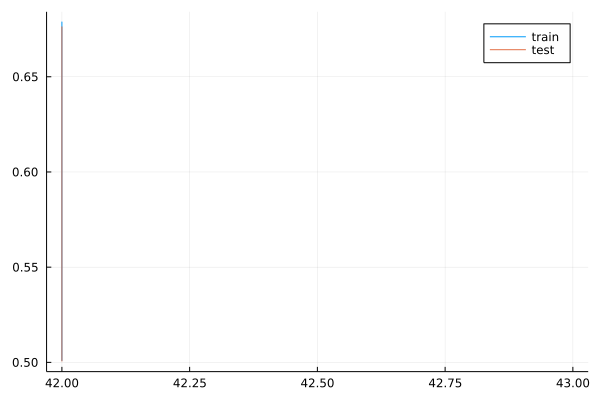

In [29]:
y=[]
push!(y,accuracy_train)
push!(y,accuracy_test)
Plots.plot(update,y,label=["train" "test"])